# Advertising / Marketing Campaign Analysis

## Introduction 

### Context 
Cluster Analysis for Ad Conversions Data

### About the Data 
The Context was taken from this [Kaggle Dataset](https://www.kaggle.com/loveall/clicks-conversion-tracking). Thanks to the Anonymous data depositor. Thank You for sharing this dataset and Business Questions

### Dataset Content
The data used in this project is from an anonymous organisation’s social media ad campaign. The data file can be downloaded from here. The file conversion_data.csv contains 1143 observations in 11 variables. Below are the descriptions of the variables.

1.) ad_id: an unique ID for each ad.

2.) xyzcampaignid: an ID associated with each ad campaign of XYZ company.

3.) fbcampaignid: an ID associated with how Facebook tracks each campaign.

4.) age: age of the person to whom the ad is shown.

5.) gender: gender of the person to whom the add is shown.

6.) interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).

7.) Impressions: the number of times the ad was shown.

8.) Clicks: number of clicks on for that ad.

9.) Spent: Amount paid by company xyz to Facebook, to show that ad.

10.) Total conversion: Total number of people who enquired about the product after seeing the ad.

11.) Approved conversion: Total number of people who bought the product after seeing the ad.

We can see that most of the variables are numerical, but two are character. That may not be a problem, but, in this case, it's quite easy to turn those into numerical data, so let's go ahead and do that, as that will allow us to perform certain functions later.


### Tasks

 - How to optimize the social ad campaigns for the highest conversion rate possible. (Attain best Reach to Conversion ratios/Click to Conversion ratios)

 - Finding the perfect target demographics with the appropriate clickthrough rates

 - Understanding the ideal turnaround/decision making time per age group to convert and retarget future social campaigns

 - Comparing the individual campaign performance so the best creative/campaign can be run again with adjusted audiences.

### Part 1 : Import the Data and Libraries

In [1]:
# Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)

In [2]:
#Import the dataset
df = pd.read_csv('conversion_data.csv')
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [3]:
df.columns

Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender',
       'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion'],
      dtype='object')

In [4]:
# Check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


There are no null values found here. Each column contains 1143 rows.

In [5]:
def dataset_info(df):
    print("The dataset contains", df.shape[1], "columns and", df.shape[0], "rows.")
    print("The dataset has", df[df.duplicated()].shape[0], "duplicated rows.")
    print(" ")
    print("The Descriptive statistics of the dataset: ")
    print(" ")
    print(df.describe().T)

In [6]:
dataset_info(df)

The dataset contains 11 columns and 1143 rows.
The dataset has 0 duplicated rows.
 
The Descriptive statistics of the dataset: 
 
                      count           mean            std       min  \
ad_id                1143.0  987261.130359  193992.814738  708746.0   
xyz_campaign_id      1143.0    1067.382327     121.629393     916.0   
fb_campaign_id       1143.0  133783.989501   20500.308622  103916.0   
interest             1143.0      32.766404      26.952131       2.0   
Impressions          1143.0  186732.132983  312762.183208      87.0   
Clicks               1143.0      33.390201      56.892438       0.0   
Spent                1143.0      51.360656      86.908418       0.0   
Total_Conversion     1143.0       2.855643       4.483593       0.0   
Approved_Conversion  1143.0       0.944007       1.737708       0.0   

                           25%         50%          75%           max  
ad_id                777632.50  1121185.00  1121804.500  1.314415e+06  
xyz_campaign_id

### Part 2 : Data Wrangling

The dataset doesn't contain any null values or errors, so i would just change the name of the columns for working with ease.

In [7]:
# Rename the columns for your ease.
df.rename({'age' : 'Age','interest' : 'Interest', 'gender' : 'Gender'}, axis = 1, inplace = True)
df.columns

Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'Age', 'Gender',
       'Interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion'],
      dtype='object')

### Part 3 : Exploratory Data Analysis

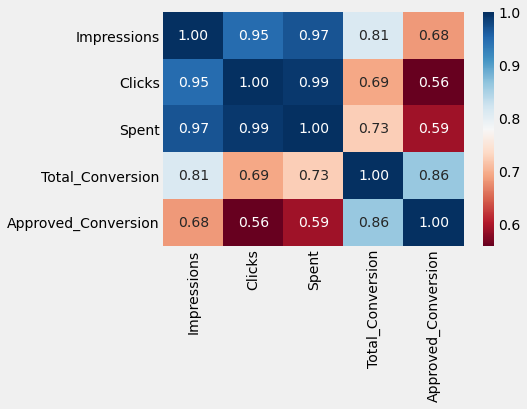

In [8]:
#Lets start with a correlation heatmap
chm = sns.heatmap(df[['Impressions', 'Clicks', 'Spent', 'Total_Conversion','Approved_Conversion']].corr(),annot = True, 
                  fmt = ".2f", cmap = "RdBu")
plt.savefig('Heatmap.png', bbox_inches = 'tight')

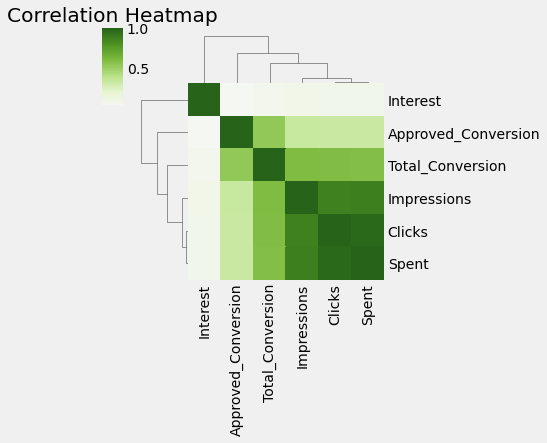

In [9]:
# Lets cluster the correlational data of the columns for easy understanding.
corrs = df.drop(columns=['ad_id', 'xyz_campaign_id', 'fb_campaign_id']).select_dtypes(include=np.number).corr(method = 'kendall')

# plot clustered heatmap of correlations
sns.clustermap(corrs,cbar_pos=(-0.05, 0.8, 0.05, 0.18), cmap='PiYG', center=0,figsize = (6,6))
plt.title("Correlation Heatmap")
plt.savefig('Corr_Heatmap.png', bbox_inches = 'tight')
plt.show()

From the above Correlational Heatmap we can infer that all our main metrics fall into one major cluster. Our Approved Conversions and Total Conversions cluster together, and what we spent clusters with impressions and clicks.

Before moving towards answering those business questions, lets create few additional, but important columns like: 

**Click-through-rate (CTR)** : CTR is the number of clicks that your ad receives divided by the number of times your ad is shown. A high CTR is often seen as a sign of good creative being presented to a relevant audience. A low click through rate is suggestive of less-than-engaging adverts.

**Conversion Rate (CR)** : Conversion rates are calculated by simply taking the number of conversions and dividing that by the number of total ad interactions that can be tracked to a conversion during the same time period. This is the percentage of clicks that result in a 'conversion'. 

**Cost Per Click (CPC)** : Cost-per-click (CPC) bidding means that you pay for each click on your ads. While it can often be seen as desirable to reduce the cost per click, the CPC needs to be considered along with other variables.

In [10]:
df['CTR'] = (df['Clicks'] / df['Impressions'])*100

In [11]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,Age,Gender,Interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.013605
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.011198
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.023480
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.024195


In [12]:
df['CR'] = (df['Total_Conversion'] / df['Clicks'])

In [13]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,Age,Gender,Interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CR
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.013605,2.0
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.011198,1.0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,inf
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.023480,1.0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.024195,1.0


In [14]:
df['CPC'] = (df['Spent'] / df['Clicks'])

In [15]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,Age,Gender,Interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CR,CPC
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.013605,2.0,1.43
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.011198,1.0,0.91
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,inf,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.023480,1.0,1.25
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.024195,1.0,1.29


### Part 4 : Answer the Business Questions

#### 4.1 How to optimize the social ad campaigns for the highest conversion rate possible. (Attain best Reach to Conversion ratios/Click to Conversion ratios)

In [16]:
df["xyz_campaign_id"].unique()

array([ 916,  936, 1178], dtype=int64)

In [17]:
df["xyz_campaign_id"].value_counts()

1178    625
936     464
916      54
Name: xyz_campaign_id, dtype: int64

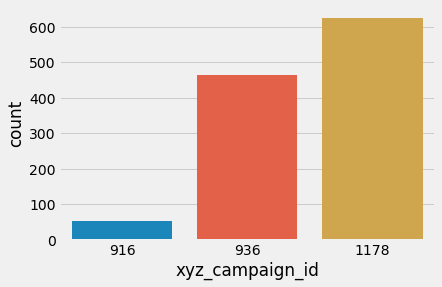

<Figure size 432x288 with 0 Axes>

In [18]:
# count plot on single categorical variable 
sns.countplot(x ='xyz_campaign_id', data = df) 
plt.show()
plt.savefig('count_of_campaigns.png', bbox_inches = 'tight')

In [19]:
df.columns

Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'Age', 'Gender',
       'Interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion', 'CTR', 'CR', 'CPC'],
      dtype='object')

In [20]:
df.groupby('xyz_campaign_id')[['Interest','Impressions','Clicks','Spent','Total_Conversion','CTR', 'CPC']].mean()

,Interest,Impressions,Clicks,Spent,Total_Conversion,CTR,CPC
xyz_campaign_id,,,,,,,
916,21.981481,8943.055556,2.092593,2.772407,1.074074,0.018015,1.330350
936,25.047414,17517.644397,4.275862,6.235711,1.157328,0.016502,1.364195
1178,39.428800,327717.945600,57.708800,89.059440,4.270400,0.016221,1.572494


From the Above Table, it is clear that campaign 1178 received that highest Clicks, Impressions and Highest Total_Conversion.

Lets Explore campaigns by Age, Gender and Clicks with Plots

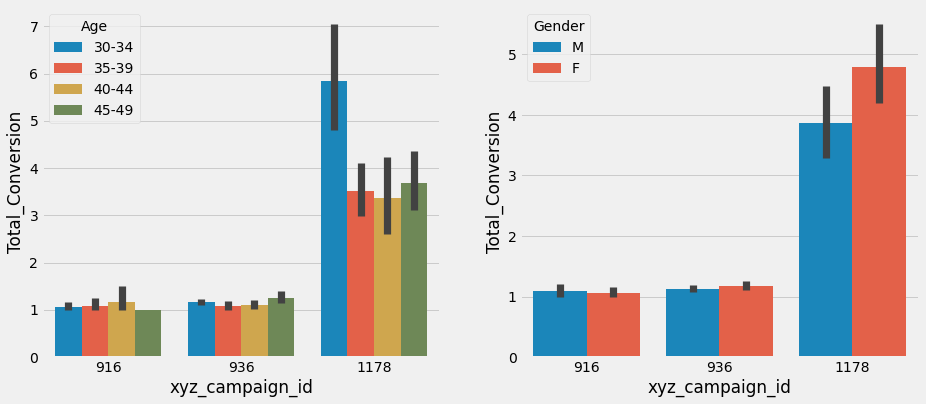

In [21]:
fig, axes = plt.subplots(1, 2,figsize=(14, 6))

axes1 = sns.barplot(ax=axes[0], x=df["xyz_campaign_id"], y=df["Total_Conversion"], hue=df["Age"], data=df)
axes2 = sns.barplot(ax=axes[1], x=df["xyz_campaign_id"], y=df["Total_Conversion"], hue=df["Gender"], data=df)
plt.savefig('Compaign_by_Age_and_Gender.png', bbox_inches = 'tight')

 - The Age group of 30-34 have the highest Total_Conversion rate in campaign 1178.
 - Females have higher Total_conversion rate than Males in campaign 1178.

#### Lets look at the people who actually brought the product after clicking the ad

In [22]:
df.groupby('xyz_campaign_id')[['Interest','Impressions','Clicks','Spent','Approved_Conversion','CTR', 'CPC']].mean()

,Interest,Impressions,Clicks,Spent,Approved_Conversion,CTR,CPC
xyz_campaign_id,,,,,,,
916,21.981481,8943.055556,2.092593,2.772407,0.444444,0.018015,1.330350
936,25.047414,17517.644397,4.275862,6.235711,0.394397,0.016502,1.364195
1178,39.428800,327717.945600,57.708800,89.059440,1.395200,0.016221,1.572494


We can make out that campaign_id 1178 made the highest Approved_Conversion, Impression and Clicks

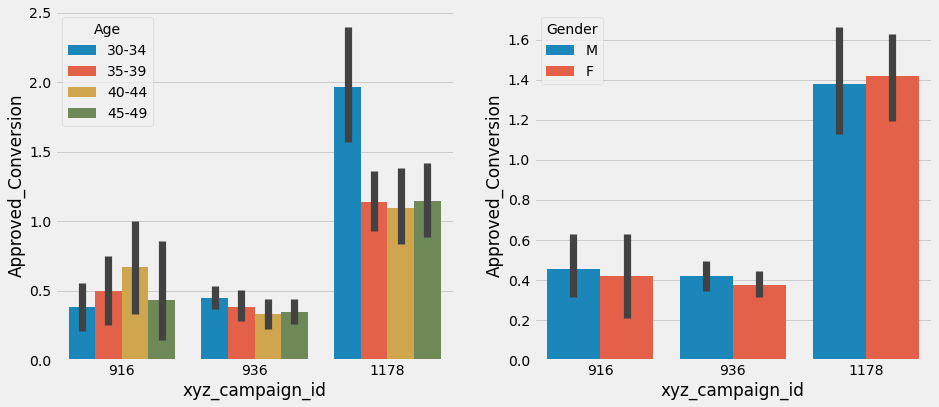

In [23]:
fig, axes = plt.subplots(1, 2,figsize=(14, 6))

axes1 = sns.barplot(ax=axes[0], x=df["xyz_campaign_id"], y=df["Approved_Conversion"], hue=df["Age"], data=df)
axes2 = sns.barplot(ax=axes[1], x=df["xyz_campaign_id"], y=df["Approved_Conversion"], hue=df["Gender"], data=df)
plt.savefig('Approved_Compaign_by_Age_&_Gender.png', bbox_inches = 'tight')

 - The Age group of 30-34 have the highest Approved_Conversion rate in campaign 1178.
 - Females have slightly higher Approved_conversion rate than Males in campaign 1178.

#### 4.2 Finding the perfect target demographics with the appropriate clickthrough rates

In [24]:
df.columns

Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'Age', 'Gender',
       'Interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion', 'CTR', 'CR', 'CPC'],
      dtype='object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   Age                  1143 non-null   object 
 4   Gender               1143 non-null   object 
 5   Interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
 11  CTR                  1143 non-null   float64
 12  CR                   1140 non-null   float64
 13  CPC                  936 non-null    float64
dtypes: float64(4), int64(8), object(2)
memory usage: 125.1+ KB


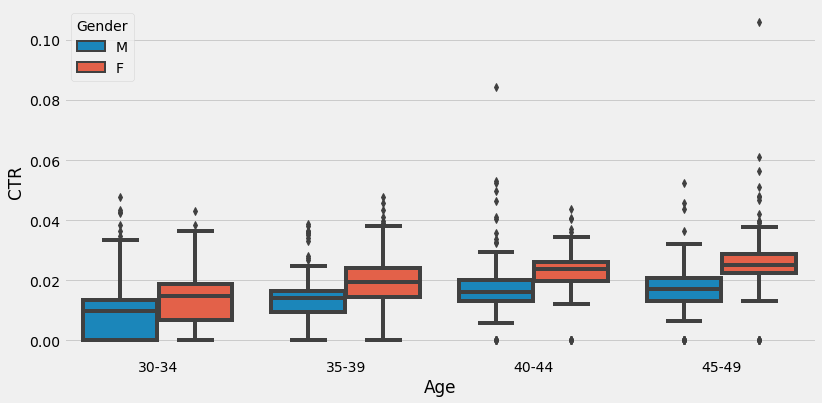

<Figure size 432x288 with 0 Axes>

In [26]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['Age'],y=df['CTR'],hue=df['Gender'])
plt.show()
plt.savefig('CTR_by_Age_and_Gender.png', bbox_inches = 'tight')

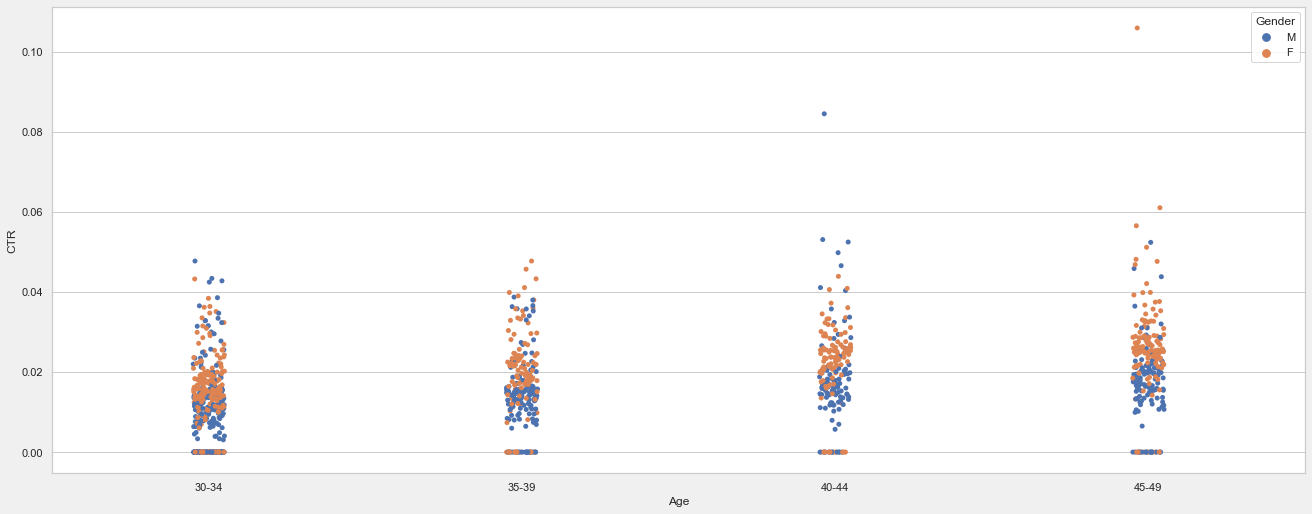

In [27]:
plt.figure(figsize=(20,8))
sns.set(style='whitegrid')
sns.stripplot(data=df,x='Age',y='CTR',hue = 'Gender',jitter = 0.05)
plt.savefig('Strip_CTR_by_Age_&_Gender.png', bbox_inches = 'tight')

 - From the above plots we see that target demographics from Higher CTR is Females with Age between 45-49.

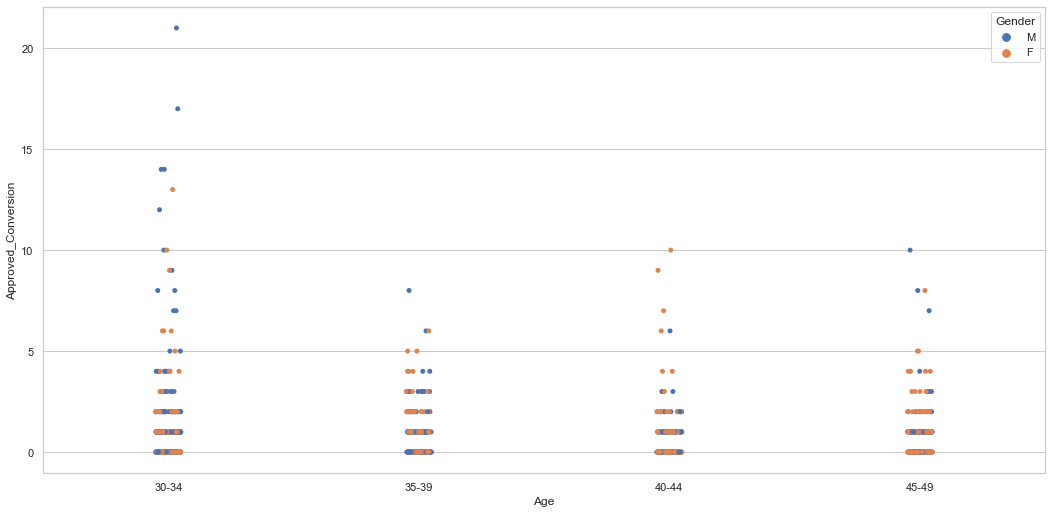

<Figure size 432x288 with 0 Axes>

In [28]:
plt.figure(figsize=(16,8))
sns.set(style='whitegrid')
sns.stripplot(data=df,x='Age',y='Approved_Conversion',hue = 'Gender',jitter = 0.05)
plt.show()
plt.savefig('Strip_Approved_Conversion_by_Age_&_Gender.png', bbox_inches = 'tight')

 - The Age group of 30-34 has the highest Approved_Conversion(brought the product). They are the highest on ROAS too.

#### 4.3 Understanding the ideal turnaround/decision making time per age group to convert and retarget future social campaigns

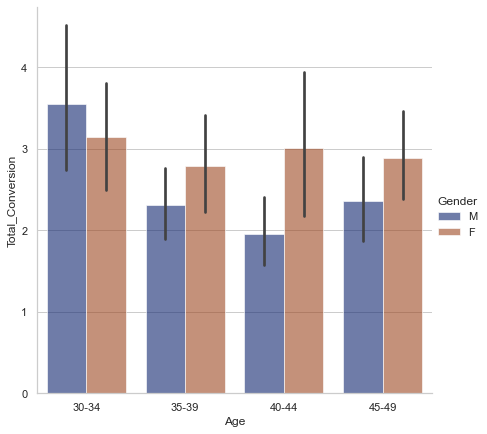

In [29]:
sns.catplot(data=df, kind="bar",x="Age", y="Total_Conversion", hue="Gender",palette="dark", alpha=.6, height=6)

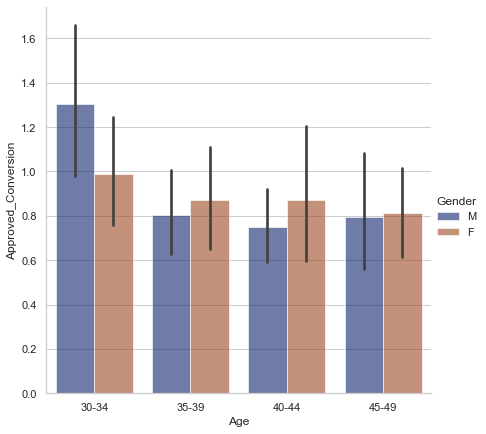

In [30]:
sns.catplot(data=df, kind="bar",x="Age", y="Approved_Conversion", hue="Gender",palette="dark", alpha=.6, height=6)

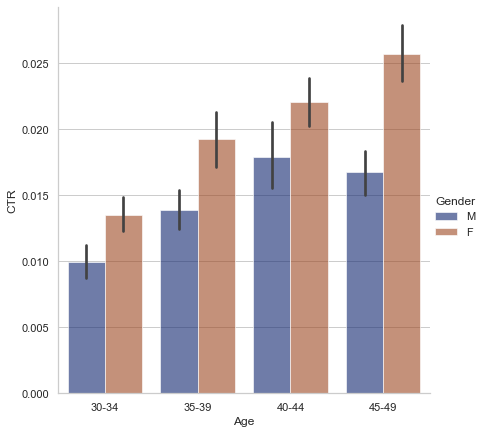

In [31]:
sns.catplot(data=df, kind="bar",x="Age", y="CTR",hue="Gender",palette="dark", alpha=.6, height=6)

 - Age Group 30-34: This age group has lesser percentage of click through rates but they have higher ratio in buying the product and doing enquiry about the product. Hence, they are risk takers who sees the ad clicks and most of the time takes the product.
 - Age group 45-49: This age group clicks on the ads most no. of times but don't buy the product or enquire frequently.

#### 4.4 Comparing the individual campaign performance so the best creative/campaign can be run again with adjusted audiences.

In [32]:
df.xyz_campaign_id.value_counts()

1178    625
936     464
916      54
Name: xyz_campaign_id, dtype: int64

In [33]:
campaign_1 = df[df.xyz_campaign_id == 916]
campaign_2 = df[df.xyz_campaign_id == 936]
campaign_3 = df[df.xyz_campaign_id == 1178]

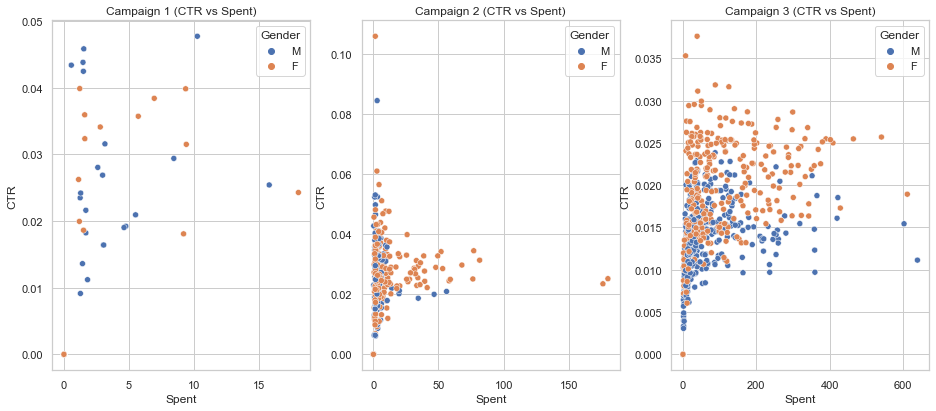

In [34]:
fig, axes = plt.subplots(1, 3,figsize=(14, 6))

axes1 = sns.scatterplot(ax=axes[0], x=campaign_1.Spent, y=campaign_1.CTR, hue=campaign_1.Gender, data=df)
axes1.set_title("Campaign 1 (CTR vs Spent)")
axes2 = sns.scatterplot(ax=axes[1], x=campaign_2.Spent, y=campaign_2.CTR, hue=campaign_2.Gender, data=df)
axes2.set_title("Campaign 2 (CTR vs Spent)")
axes3 = sns.scatterplot(ax=axes[2], x=campaign_3.Spent, y=campaign_3.CTR, hue=campaign_3.Gender, data=df)
axes3.set_title("Campaign 3 (CTR vs Spent)")
plt.savefig('Campaigns_performance_by_CTR_vs_Spent.png', bbox_inches = 'tight')

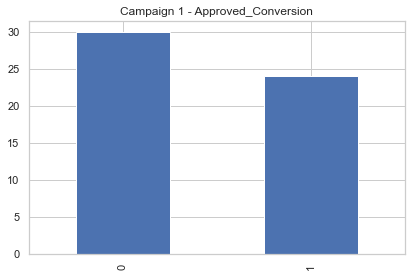

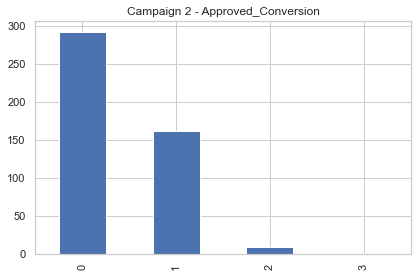

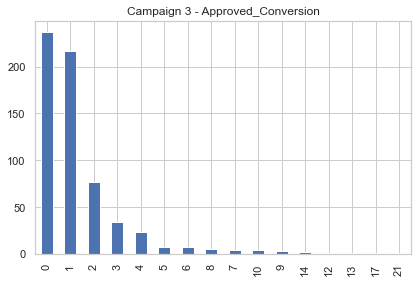

In [35]:
fig, axes = plt.subplots()

axes1 = campaign_1.Approved_Conversion.value_counts().plot(kind = 'bar')
axes1.set_title("Campaign 1 - Approved_Conversion")
plt.show()
axes2 = campaign_2.Approved_Conversion.value_counts().plot(kind = 'bar')
axes2.set_title("Campaign 2 - Approved_Conversion")
plt.show()
axes3 = campaign_3.Approved_Conversion.value_counts().plot(kind = 'bar')
axes3.set_title("Campaign 3 - Approved_Conversion")
plt.show()

 - Campaign_3 wins the battle due to highest approved_conversion rate [62%] and more number of people buying the product after seeing the ad.
 - Campaign_1 has better performance with 44% approved_conversion rate than Campaign_2 with 37%
 
 Note : The Approved_Conversion Rate was calculated by Dividing each Campaign's value count (number of ads) with its Approved_Conversion (number of people buying the product after the ad) for value greater than 1 

In [36]:
campaign_1.Approved_Conversion.value_counts()

0    30
1    24
Name: Approved_Conversion, dtype: int64

Campaign_1 has 44% of Approved Conversion Rate 

In [37]:
campaign_2.Approved_Conversion.value_counts()

0    292
1    162
2      9
3      1
Name: Approved_Conversion, dtype: int64

Campaign_2 has 37% of Approved Conversion Rate

In [38]:
campaign_3.Approved_Conversion.value_counts()

0     237
1     217
2      77
3      34
4      24
5       7
6       7
8       5
7       4
10      4
9       3
14      2
12      1
13      1
17      1
21      1
Name: Approved_Conversion, dtype: int64

Campaign_3 has 62 % of Conversion Rate

### Part 5 : Insights 

 - **How to optimize the social ad campaigns for the highest conversion rate possible. (Attain best Reach to Conversion ratios/Click to Conversion ratios)**
    - Campaign_id 1178 received that highest Clicks, Impressions and Highest Total_Conversion.
    - The Age group of 30-34 have the highest Total_Conversion rate in campaign 1178, so they should be the main aim.
    - Females have higher Total_Conversion rate than Males in campaign 1178.
    
    - Campaign_id 1178 made the highest Approved_Conversion, Impression and Clicks.
    - The Age group of 30-34 have the highest Approved_Conversion rate in campaign 1178, so they should be the main aim.
    - Females have slightly higher Approved_conversion rate than Males in campaign 1178.

    - The number of ad counts should be more for better reach.
    - More the number of times the add is shown i.e. "impression", more approved_conversion rate is achieved.


 - **Finding the perfect target demographics with the appropriate clickthrough rates**
    - Target demographics from Higher CTR is Females with Age between 45-49.
    - The Age group of 30-34 has the highest Approved_Conversion(brought the product). They are the highest on ROAS too.


 - **Understanding the ideal turnaround/decision making time per age group to convert and retarget future social campaigns**

    - Age Group 30-34: This age group has lesser percentage of click through rates but they have higher ratio in buying the product and doing enquiry about the product. Hence, they are risk takers who sees the ad clicks and most of the time takes the product with less time in decision making. They are followed by 35-39 and 40-44.
    - Age group 45-49: This age group clicks on the ads most no. of times but don't buy the product or enquire frequently.


 - **Comparing the individual campaign performance so the best creative/campaign can be run again with adjusted audiences.**

   - Campaign_3 (1178) wins the battle due to highest approved_conversion rate [62%] and more number of people buying the product after seeing the ad.
   - Campaign_1 (916) has better performance with 44% approved_conversion rate than Campaign_2 (936) with 37% even though it is less involved with no of ads.